In [1]:
import torch
from VizWizAnswerModel import VizWizAnswerModel
from create_answer_vocab import answer_vocab

# Re-initialize the model (use the same class and vocab size)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = VizWizAnswerModel(len(answer_vocab))  # Replace with actual vocab size or function
model.load_state_dict(torch.load("vizwiz_model_FR.pth", map_location=device))
model.to(device)
model.eval()  # Set to evaluation mode
print("Model loaded from vizwiz_model_FR.pth")


Model loaded from vizwiz_model_FR.pth


/home/radheshyamrouth/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
import cv2
import torch
from PIL import Image
import open_clip
from create_answer_vocab import ans2idx
# import matplotlib.pyplot as plt

from VizWizAnswerModel import VizWizAnswerModel
from create_answer_vocab import answer_vocab

# Re-initialize the model (use the same class and vocab size)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = VizWizAnswerModel(len(answer_vocab))  # Replace with actual vocab size or function
model.load_state_dict(torch.load("vizwiz_model_FR.pth", map_location=device))
model.to(device)
model.eval()  # Set to evaluation mode
print("Model loaded from vizwiz_model_FR.pth")


# ---------- SETTINGS ----------
image_path = "inference_sample/image6.jpg"  # <- Just change this

# Load image using OpenCV (in BGR format)
img_cv2 = cv2.imread(image_path)

# Convert BGR to RGB if you want natural colors
img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

# Show image in a window
cv2.imshow("Sample Image", img_rgb)

# Wait until any key is pressed
cv2.waitKey(0)

# Destroy the window after closing
cv2.destroyAllWindows()
question = input("Enter your question: ")

# ---------- DEVICE ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------- LOAD MODELS ----------
# Image model
model_ig, _, preprocess_ig = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
model_ig = model_ig.to(device).eval()

# Text model
model_q, _, _ = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='openai')
model_q = model_q.to(device).eval()
tokenizer = open_clip.get_tokenizer('ViT-B-32')

#  model
model = model.to(device).eval()

# ---------- PROCESS INPUT ----------
# Image
image = Image.open(image_path).convert("RGB")
image_input = preprocess_ig(image).unsqueeze(0).to(device)

# Question
text_input = tokenizer([question]).to(device)

# ---------- EXTRACT FEATURES ----------
with torch.no_grad():
    image_feat = model_ig.encode_image(image_input)
    text_feat = model_q.encode_text(text_input)

# ---------- PREDICT ----------
with torch.no_grad():
    probs = model(image_feat, text_feat)
    pred_idx = torch.argmax(probs, dim=1).item()
    pred_answer = next((k for k, v in ans2idx.items() if v == pred_idx), None)

print("Predicted Answer:", pred_answer)


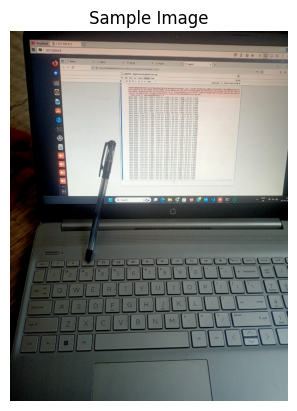

Enter your question:  What is it?


Predicted Answer: laptop


In [38]:
import torch
from PIL import Image
import open_clip
from create_answer_vocab import ans2idx
import matplotlib.pyplot as plt


# ---------- SETTINGS ----------
image_path = "inference_sample/image6.jpg"  # <- Just change this
img = Image.open(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Sample Image")
plt.show()
question = input("Enter your question: ")

# ---------- DEVICE ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------- LOAD MODELS ----------
# Image model
model_ig, _, preprocess_ig = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
model_ig = model_ig.to(device).eval()

# Text model
model_q, _, _ = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='openai')
model_q = model_q.to(device).eval()
tokenizer = open_clip.get_tokenizer('ViT-B-32')

#  model
model = model.to(device).eval()

# ---------- PROCESS INPUT ----------
# Image
image = Image.open(image_path).convert("RGB")
image_input = preprocess_ig(image).unsqueeze(0).to(device)

# Question
text_input = tokenizer([question]).to(device)

# ---------- EXTRACT FEATURES ----------
with torch.no_grad():
    image_feat = model_ig.encode_image(image_input)
    text_feat = model_q.encode_text(text_input)

# ---------- PREDICT ----------
with torch.no_grad():
    probs = model(image_feat, text_feat)
    pred_idx = torch.argmax(probs, dim=1).item()
    pred_answer = next((k for k, v in ans2idx.items() if v == pred_idx), None)

print("Predicted Answer:", pred_answer)


In [27]:
import os
import torch
from PIL import Image
import open_clip

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model_ig, ig, preprocess_ig = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
model_ig = model_ig.to(device)
model_ig.eval()

# Feature extraction for a single image
def extract_and_save_single_image_feature(image_path, output_path):
    try:
        image = Image.open(image_path).convert("RGB")
        image_input = preprocess_ig(image).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model_ig.encode_image(image_input).squeeze(0).cpu()

        torch.save(image_features, output_path)
        print(f"Feature saved at: {output_path}")
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

# Example usage
image_path = 'inference_sample/image6.jpg'  # Replace with your image path
output_path = 'inference_feature/image6.pt'  # Desired output path
extract_and_save_single_image_feature(image_path, output_path)


Feature saved at: inference_feature/image6.pt


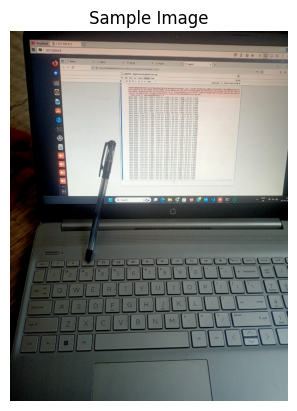

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

# Load image
image_path = "inference_sample/image6.jpg"  # Change this to your image path
img = Image.open(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Sample Image")
plt.show()


In [34]:
import torch
import open_clip

# Set up device and load model
device = "cuda" if torch.cuda.is_available() else "cpu"
model_q, _q, _q = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='openai')
model_q = model_q.to(device)
model_q.eval()
tokenizer = open_clip.get_tokenizer('ViT-B-32')

# Function to extract and save text feature
def extract_and_save_question_feature(question, output_path):
    try:
        with torch.no_grad():
            text_input = tokenizer([question]).to(device)
            text_features = model_q.encode_text(text_input).squeeze(0).cpu()
        torch.save(text_features, output_path)
        print(f"Feature saved at: {output_path}")
    except Exception as e:
        print(f"Error processing question: {question}\nError: {e}")

# Example usage
question = input("Enter your question: ")
output_path = "inference_question/text_image6.pt"  # You can customize the output filename if needed
extract_and_save_question_feature(question, output_path)


Enter your question:  Are there a pen and laptop?


Feature saved at: inference_question/text_image6.pt


In [35]:
import torch
from create_answer_vocab import ans2idx


# Load features
image_feat = torch.load("inference_feature/image6.pt")
question_feat = torch.load("inference_question/text_image6.pt")

# Add batch dimension
image_feat = image_feat.unsqueeze(0).to(device)
question_feat = question_feat.unsqueeze(0).to(device)

# Model prediction
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()
with torch.no_grad():
    probs = model(image_feat, question_feat)
    pred_idx = torch.argmax(probs, dim=1).item()
    pred_answer = next((k for k, v in ans2idx.items() if v == pred_idx), None)
    print("Predicted Answer:", pred_answer)



Predicted Answer: unanswerable


In [19]:
import os
import torch
from PIL import Image
import open_clip

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model_ig, ig, preprocess_ig = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
model_ig = model_ig.to(device)
model_ig.eval()

# Feature extraction for a single image
def extract_and_save_single_image_feature(image_path, output_path):
    try:
        image = Image.open(image_path).convert("RGB")
        image_input = preprocess_ig(image).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model_ig.encode_image(image_input).squeeze(0).cpu()

        torch.save(image_features, output_path)
        print(f"Feature saved at: {output_path}")
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

# Example usage
image_path = 'inference_sample/image4.jpg'  # Replace with your image path
output_path = 'inference_feature/image4.pt'  # Desired output path
extract_and_save_single_image_feature(image_path, output_path)


Feature saved at: inference_feature/image4.pt


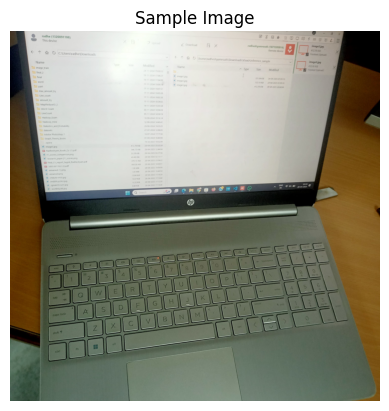

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

# Load image
image_path = "inference_sample/image4.jpg"  # Change this to your image path
img = Image.open(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title("Sample Image")
plt.show()


In [21]:
import torch
import open_clip

# Set up device and load model
device = "cuda" if torch.cuda.is_available() else "cpu"
model_q, _q, _q = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='openai')
model_q = model_q.to(device)
model_q.eval()
tokenizer = open_clip.get_tokenizer('ViT-B-32')

# Function to extract and save text feature
def extract_and_save_question_feature(question, output_path):
    try:
        with torch.no_grad():
            text_input = tokenizer([question]).to(device)
            text_features = model_q.encode_text(text_input).squeeze(0).cpu()
        torch.save(text_features, output_path)
        print(f"Feature saved at: {output_path}")
    except Exception as e:
        print(f"Error processing question: {question}\nError: {e}")

# Example usage
question = input("Enter your question: ")
output_path = "inference_question/text_image4.pt"  # You can customize the output filename if needed
extract_and_save_question_feature(question, output_path)


Enter your question:  What is it ?


Feature saved at: inference_question/text_image4.pt


In [39]:
import torch
from create_answer_vocab import ans2idx


# Load features
image_feat = torch.load("inference_feature/image4.pt")
question_feat = torch.load("inference_question/text_image4.pt")
print(image_feat.size())
print(question_feat.size())

# Add batch dimension
image_feat = image_feat.unsqueeze(0).to(device)
question_feat = question_feat.unsqueeze(0).to(device)

# Model prediction
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()
with torch.no_grad():
    probs = model(image_feat, question_feat)
    pred_idx = torch.argmax(probs, dim=1).item()
    pred_answer = next((k for k, v in ans2idx.items() if v == pred_idx), None)
    print("Predicted Answer:", pred_answer)



torch.Size([512])
torch.Size([512])
Predicted Answer: laptop
